In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#from random import seed, randrange
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
from math import sqrt, pi, exp
%matplotlib inline

In [40]:
#Reading csv values
df = pd.read_csv(r'Dataset/heart_edited.csv')
#df.head()
#print(df.to_string())

In [41]:
#Convert question marks to NaN
#df['ca'] = df['ca'].replace('?', np.NaN)
#df['thal'] = df['thal'].replace('?', np.NaN)
df['ca'] = df['ca'].replace('?', 0.672240803) #Calculated Mean
df['thal'] = df['thal'].replace('?', 2) #Calculated Mean

In [42]:
#Converting all values from strings to floats
df['age'] = df['age'].astype(float)
df['sex'] = df['sex'].astype(float)
df['cp'] = df['cp'].astype(float)
df['trestbps'] = df['trestbps'].astype(float)
df['chol'] = df['chol'].astype(float)
df['fbs'] = df['fbs'].astype(float)
df['restecg'] = df['restecg'].astype(float)
df['thalach'] = df['thalach'].astype(float)
df['exang'] = df['exang'].astype(float)
df['oldpeak'] = df['oldpeak'].astype(float)
df['slope'] = df['slope'].astype(float)
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)
df['target'] = df['target'].astype(float)

In [43]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,2.0,0.0,2.0,0.0
1,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,2.0,0.0,2.0,0.0
2,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,2.0,0.0,2.0,0.0
3,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,2.0,0.0,2.0,0.0
4,35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,1.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,2.0,1.0,2.0,0.0
299,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,1.0,0.0,2.0,0.0
300,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,2.0,1.0,2.0,0.0
301,76.0,0.0,3.0,140.0,197.0,0.0,1.0,116.0,0.0,1.1,1.0,0.0,2.0,0.0


In [44]:
#print(df.loc[df['ca'] == 10]) #I want NaN

In [45]:
#print(df.loc[df['thal'] == 10]) #I want NaN

In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.399340,0.672241,2.326733,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,0.583020,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [47]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0.0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.591463,0.280590,2.134146
1.0,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.172662,1.134333,2.553957


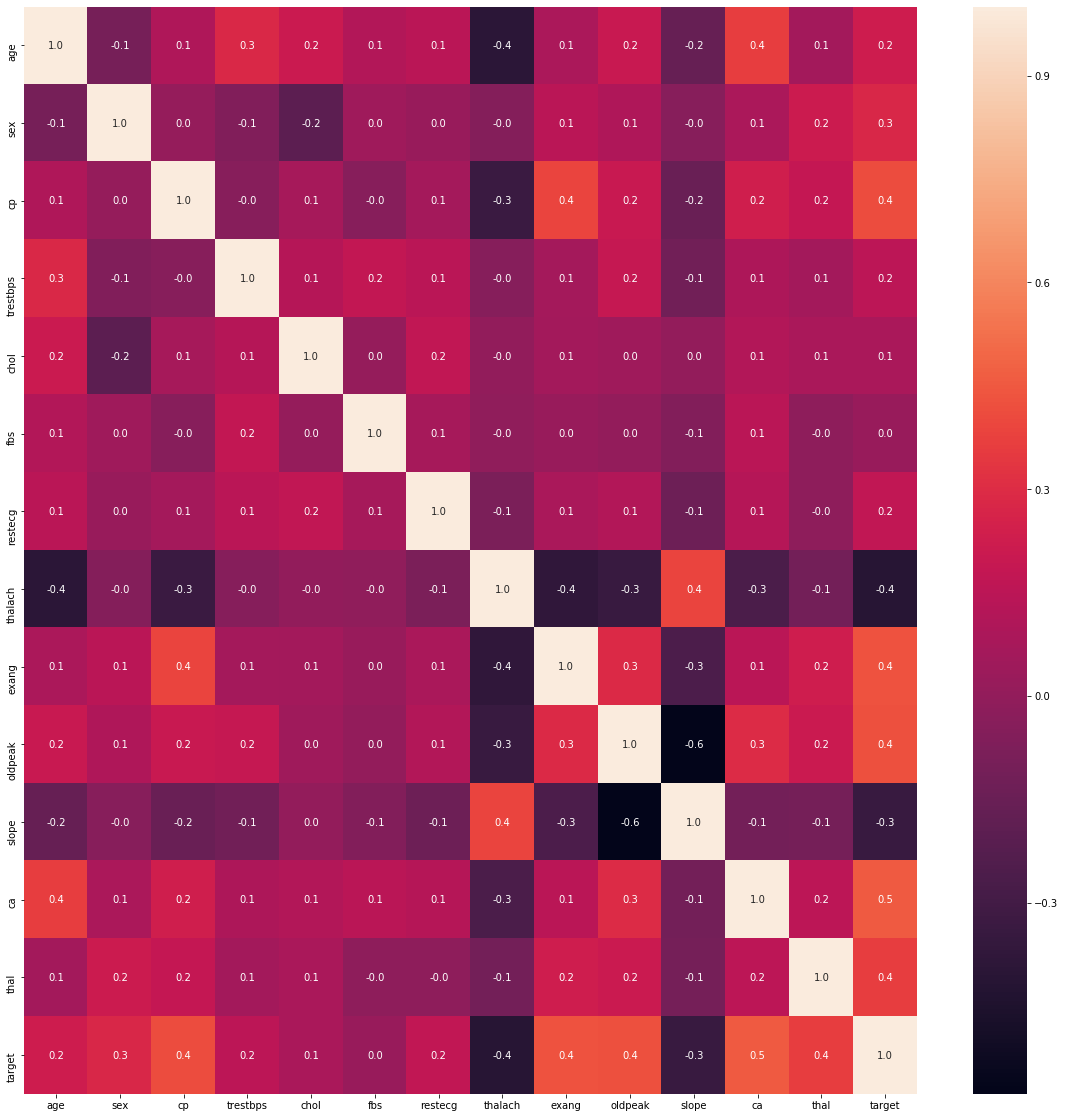

In [48]:
#Correlation Heatmaps

import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

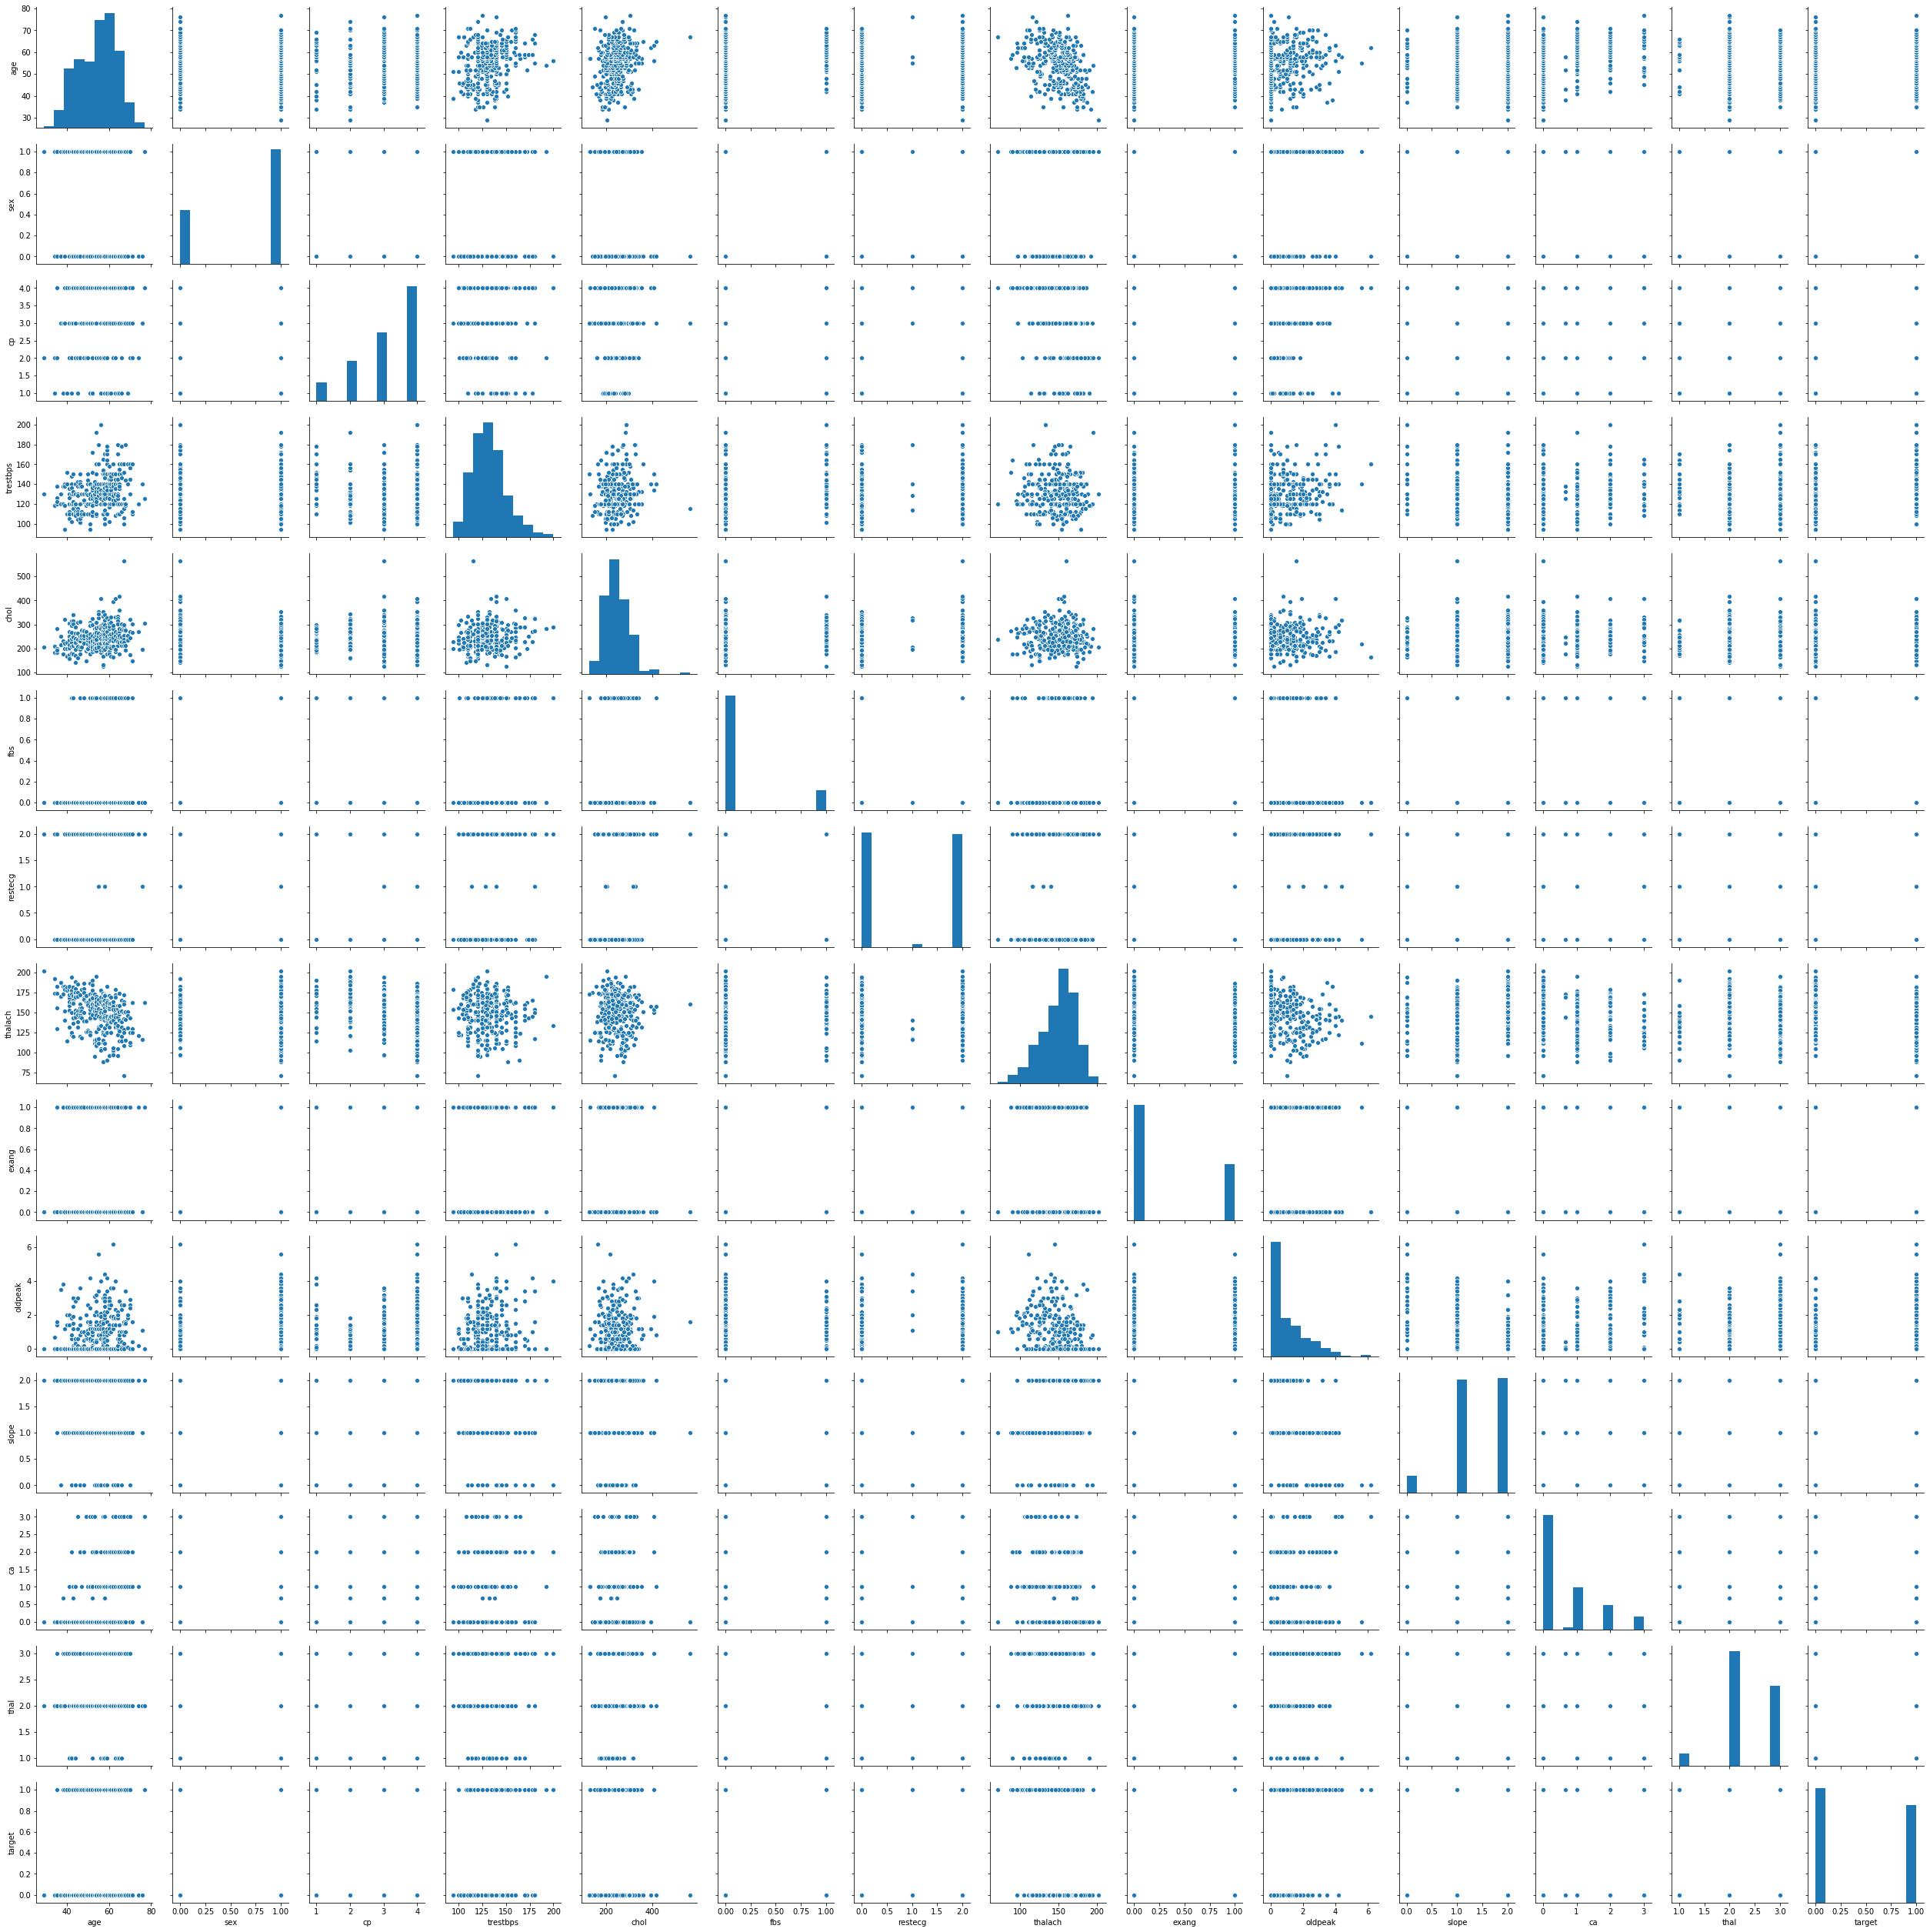

In [49]:
#Correlation Graphs
sns.pairplot(df)
plt.show()

Young Ages : 15
Middle Ages : 128
Elderly Ages : 152


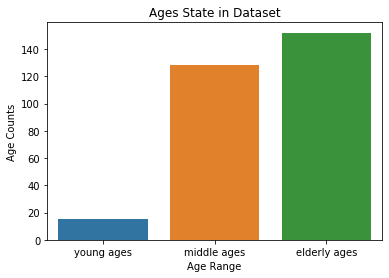

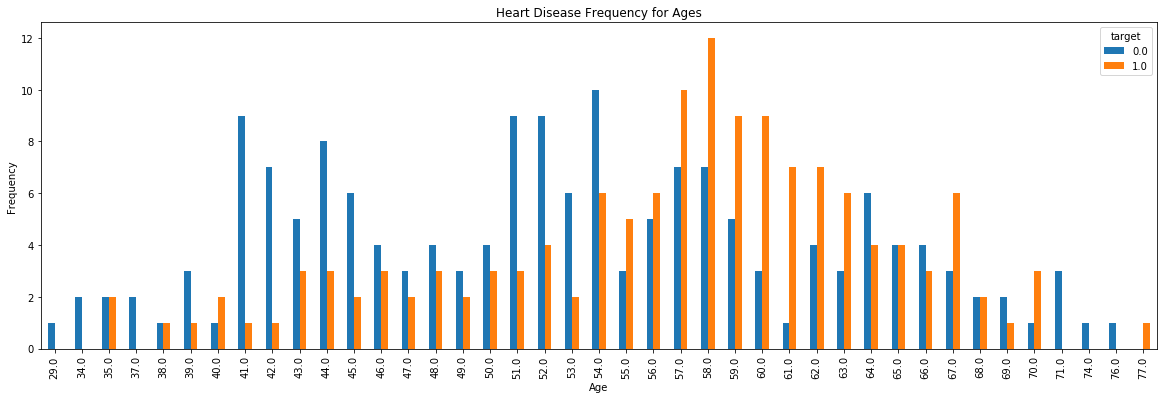

In [50]:
#Age v Target Analysis
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

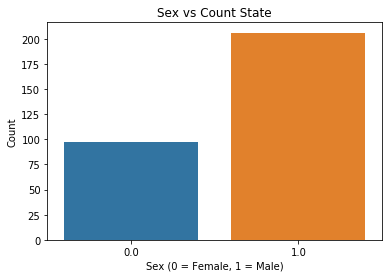

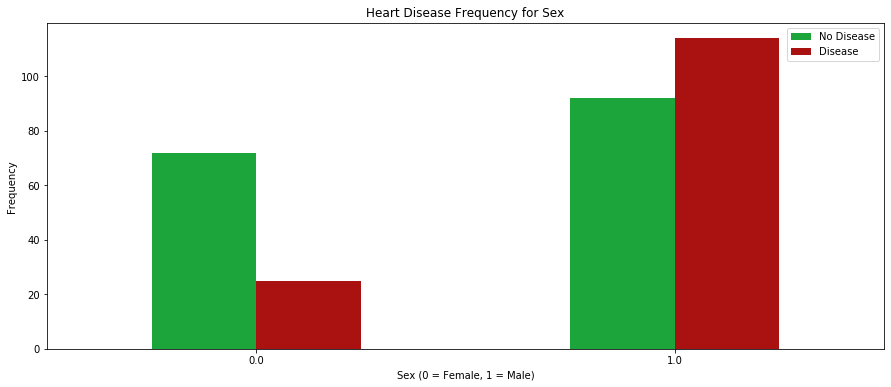

In [51]:
#Sex v Target Analysis
sns.countplot(df.sex)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.title('Sex vs Count State')
plt.show()

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

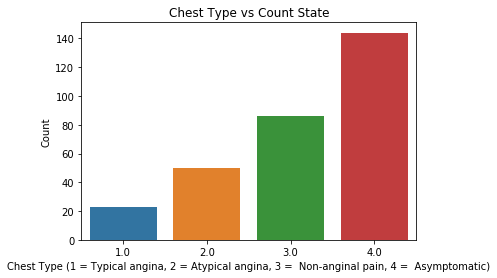

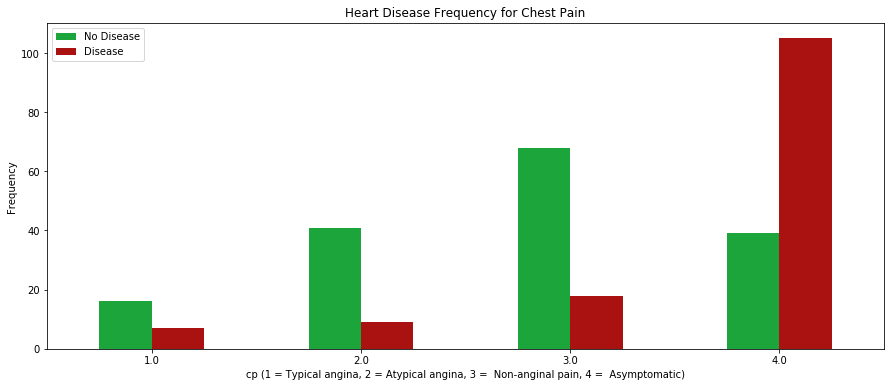

In [52]:
#Chest Pain vs Target Analysis
sns.countplot(df.cp)
plt.xlabel('Chest Type (1 = Typical angina, 2 = Atypical angina, 3 =  Non-anginal pain, 4 =  Asymptomatic)')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Chest Pain')
plt.xlabel('cp (1 = Typical angina, 2 = Atypical angina, 3 =  Non-anginal pain, 4 =  Asymptomatic)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

Ideal Blood Pressure : 60
Pre-High Blood Pressure : 145
High Blood Pressure : 66


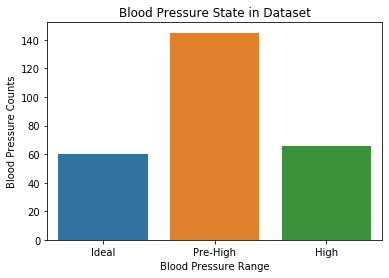

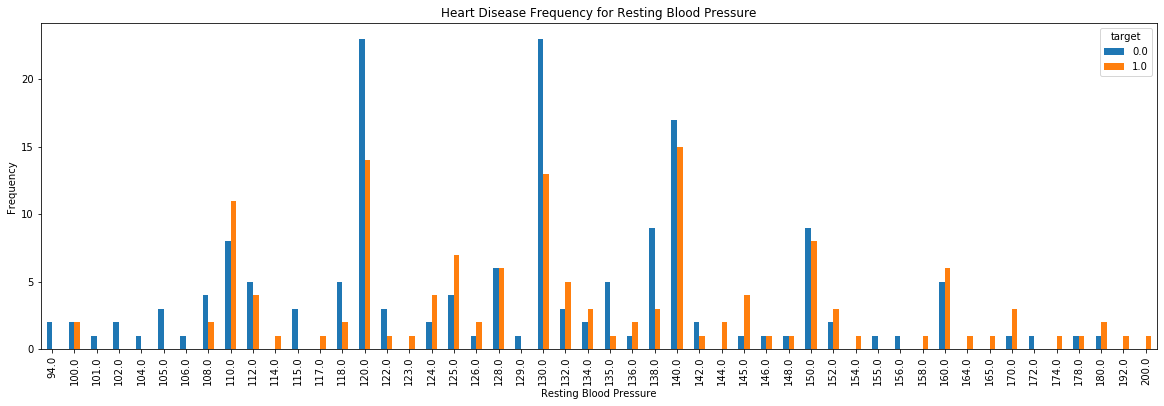

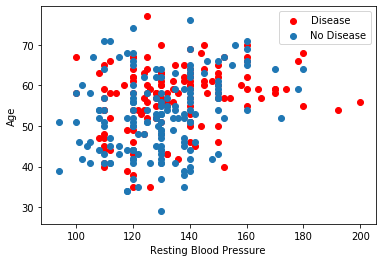

In [53]:
#Resting Blood Pressure (trestbps) vs Target
ideal_blood_pressure=df[(df.trestbps>=90)&(df.trestbps<120)]
pre_high_blood_pressure=df[(df.trestbps>=120)&(df.trestbps<140)]
high_blood_pressure=df[(df.trestbps>140)]
print('Ideal Blood Pressure :',len(ideal_blood_pressure))
print('Pre-High Blood Pressure :',len(pre_high_blood_pressure))
print('High Blood Pressure :',len(high_blood_pressure))
sns.barplot(x=['Ideal','Pre-High', 'High'],y=[len(ideal_blood_pressure),len(pre_high_blood_pressure),len(high_blood_pressure)])
plt.xlabel('Blood Pressure Range')
plt.ylabel('Blood Pressure Counts')
plt.title('Blood Pressure State in Dataset')
plt.show()

pd.crosstab(df.trestbps,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.show()

#Resting Blood Pressure (trestbps) vs Age for Target
plt.scatter(x=df.trestbps[df.target==1], y=df.age[(df.target==1)], c="red")
plt.scatter(x=df.trestbps[df.target==0], y=df.age[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Age")
plt.show()

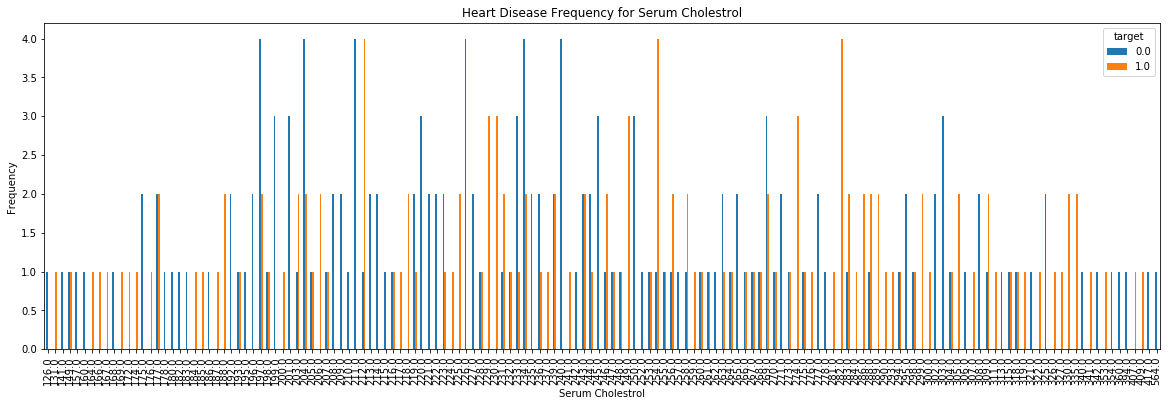

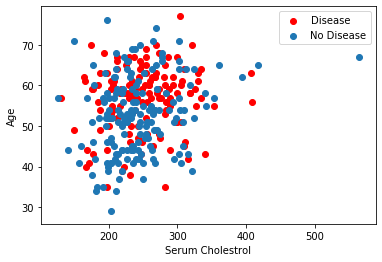

In [54]:
#Serum Cholestrol (chol) vs Target
pd.crosstab(df.chol,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Serum Cholestrol')
plt.xlabel('Serum Cholestrol')
plt.ylabel('Frequency')
plt.show()

#Serum Cholestrol (chol) vs Age for Target
plt.scatter(x=df.chol[df.target==1], y=df.age[(df.target==1)], c="red")
plt.scatter(x=df.chol[df.target==0], y=df.age[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Serum Cholestrol")
plt.ylabel("Age")
plt.show()

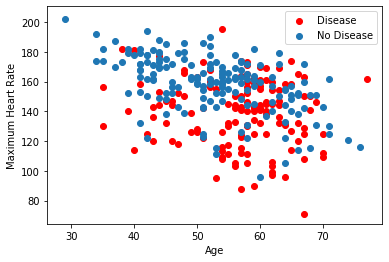

In [55]:
#Maximum heart rate achieved during thallium stress test (Thalach) vs Age for Target
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

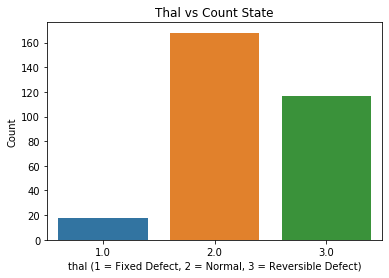

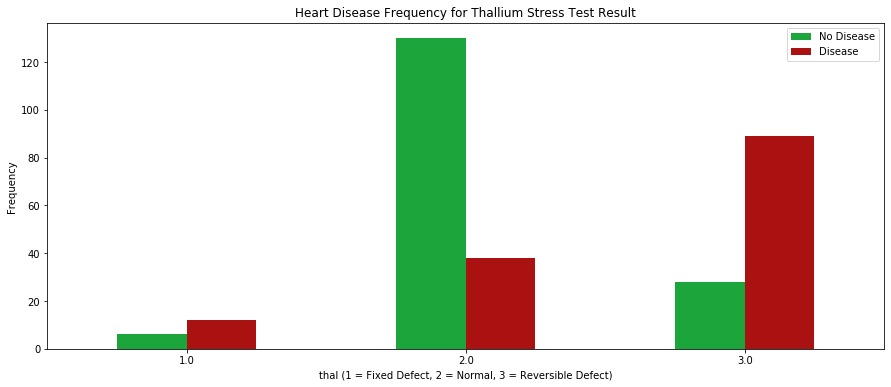

In [56]:
#Thallium stress test result (Thal) vs Target
sns.countplot(df.thal)
plt.xlabel('thal (1 = Fixed Defect, 2 = Normal, 3 = Reversible Defect)')
plt.ylabel('Count')
plt.title('Thal vs Count State')
plt.show()

pd.crosstab(df.thal,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Thallium Stress Test Result')
plt.xlabel('thal (1 = Fixed Defect, 2 = Normal, 3 = Reversible Defect)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

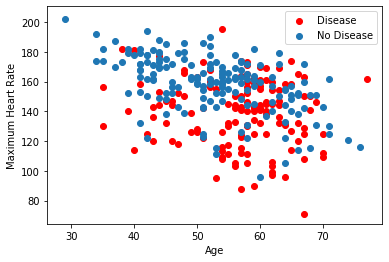

In [57]:
#Maximum Heart Rate during Thallium Stress Test (thalach) vs Age for Target
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [58]:
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
    [3.110073483,1.781539638,0],
    [1.343808831,3.368360954,0],
    [3.582294042,4.67917911,0],
    [2.280362439,2.866990263,0],
    [7.423436942,4.696522875,1],
    [5.745051997,3.533989803,1],
    [9.172168622,2.511101045,1],
    [7.792783481,3.424088941,1],
    [7.939820817,0.791637231,1]]
separated = separate_by_class(dataset)
for label in separated:
    print(label)
    for row in separated[label]:
        print(row)

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


In [59]:
heart_disease_dataset = np.array(df)

In [60]:
separated = separate_by_class(heart_disease_dataset)
for label in separated:
    print(label)
    for row in separated[label]:
        print(row)

0.0
[ 29.   1.   2. 130. 204.   0.   2. 202.   0.   0.   2.   0.   2.   0.]
[ 34.   1.   1. 118. 182.   0.   2. 174.   0.   0.   2.   0.   2.   0.]
[ 34.    0.    2.  118.  210.    0.    0.  192.    0.    0.7   2.    0.
   2.    0. ]
[ 35.    0.    4.  138.  183.    0.    0.  182.    0.    1.4   2.    0.
   2.    0. ]
[ 35.   1.   2. 122. 192.   0.   0. 174.   0.   0.   2.   0.   2.   0.]
[ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   0.    0.
   2.    0. ]
[ 37.   0.   3. 120. 215.   0.   0. 170.   0.   0.   2.   0.   2.   0.]
[ 38.          1.          3.        138.        175.          0.
   0.        173.          0.          0.          2.          0.6722408
   2.          0.       ]
[ 39.   1.   3. 140. 321.   0.   2. 182.   0.   0.   2.   0.   2.   0.]
[ 39.   0.   3.  94. 199.   0.   0. 179.   0.   0.   2.   0.   2.   0.]
[ 39.   0.   3. 138. 220.   0.   0. 152.   0.   0.   1.   0.   2.   0.]
[ 40.    1.    1.  140.  199.    0.    0.  178.    1.    1.4   2.    

In [61]:
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [62]:
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

In [63]:
#The first trick is the use of the zip() function that will aggregate elements from each provided argument. 
#We pass in the dataset to the zip() function with the * operator that separates the dataset (that is a list of lists) 
#into separate lists for each row. The zip() function then iterates over each element of each row and returns a column 
#from the dataset as a list of numbers. A clever little trick.
#--------
#We then calculate the mean, standard deviation and count of rows in each column. A tuple is created from these 3 numbers 
#and a list of these tuples is stored. We then remove the statistics for the class variable as we will not need these 
#statistics.
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

In [64]:
summary = summarize_dataset(dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


In [65]:
heart_summary = summarize_dataset(heart_disease_dataset)
print(heart_summary)
#age -- sex -- cp -- trestbps -- chol -- fbs -- restecg -- thalach -- exang -- oldpeak -- slope -- ca -- thal -- target

[(54.43894389438944, 9.038662442446743, 303), (0.6798679867986799, 0.4672988277701313, 303), (3.1584158415841586, 0.9601256119600123, 303), (131.68976897689768, 17.599747729587694, 303), (246.69306930693068, 51.77691754263702, 303), (0.1485148514851485, 0.35619787492797605, 303), (0.9900990099009901, 0.9949712915251786, 303), (149.6072607260726, 22.875003276980376, 303), (0.32673267326732675, 0.4697944645223171, 303), (1.03960396039604, 1.1610750220686346, 303), (1.3993399339933994, 0.6162261453459629, 303), (0.672240802679868, 0.9312094227120483, 303), (2.3267326732673266, 0.5830198426374995, 303)]


In [66]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

In [67]:
summary = summarize_by_class(dataset)
for label in summary:
    print(label)
    for row in summary[label]:
        print(row)

0
(2.7420144012, 0.9265683289298018, 5)
(3.0054686692, 1.1073295894898725, 5)
1
(7.6146523718, 1.2344321550313704, 5)
(2.9914679790000003, 1.4541931384601618, 5)


In [68]:
heart_summary = summarize_by_class(heart_disease_dataset)
for label in heart_summary:
    print(label)
    for row in heart_summary[label]:
        print(row)
#age -- sex -- cp -- trestbps -- chol -- fbs -- restecg -- thalach -- exang -- oldpeak -- slope -- ca -- thal -- target

0.0
(52.58536585365854, 9.511957240241179, 164)
(0.5609756097560976, 0.4977880144970611, 164)
(2.792682926829268, 0.9166196216259302, 164)
(129.25, 16.204738760072885, 164)
(242.640243902439, 53.456580304526184, 164)
(0.1402439024390244, 0.34830342744502735, 164)
(0.8353658536585366, 0.9862704057116894, 164)
(158.3780487804878, 19.199079888422336, 164)
(0.1402439024390244, 0.34830342744502735, 164)
(0.5865853658536585, 0.7817335141507573, 164)
(1.5914634146341464, 0.594597604718296, 164)
(0.28058977078658537, 0.6287776704741435, 164)
(2.1341463414634148, 0.4364439435667583, 164)
1.0
(56.62589928057554, 7.938416391282095, 139)
(0.8201438848920863, 0.38545660033435664, 139)
(3.5899280575539567, 0.8236798804823482, 139)
(134.568345323741, 18.76901947811187, 139)
(251.4748201438849, 49.48683486694796, 139)
(0.15827338129496402, 0.3663172143548364, 139)
(1.1726618705035972, 0.9774861098680027, 139)
(139.25899280575538, 22.593232964536153, 139)
(0.5467625899280576, 0.4996088554513592, 139)
(

In [69]:
#Calculating the probability or likelihood of observing a given real-value like X1 is difficult.
#One way we can do this is to assume that X1 values are drawn from a distribution, such as a Gaussian distribution.

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [70]:
# Test Gaussian PDF
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


In [71]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, count = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

In [72]:
# Test calculating class probabilities
dataset = [[3.393533211,2.331273381,0],
    [3.110073483,1.781539638,0],
    [1.343808831,3.368360954,0],
    [3.582294042,4.67917911,0],
    [2.280362439,2.866990263,0],
    [7.423436942,4.696522875,1],
    [5.745051997,3.533989803,1],
    [9.172168622,2.511101045,1],
    [7.792783481,3.424088941,1],
    [7.939820817,0.791637231,1]]
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[6])
print(probabilities)

{0: 0.00036240188135671384, 1: 0.013133373825769748}


In [73]:
probabilities = calculate_class_probabilities(heart_summary, heart_disease_dataset[8])
print(probabilities)

{0.0: 8.132579158930619e-11, 1.0: 8.183483999405048e-15}


In [74]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label
 
# Naive Bayes Algorithm
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)

In [75]:
# Test Naive Bayes on Iris Dataset
# seed(1)
# filename = 'Dataset/heart_edited.csv'
# dataset = load_csv(filename)
# for i in range(len(dataset[0])-1):
#     str_column_to_float(dataset, i)
# # convert class column to integers
# str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
# n_folds = 5
# scores = evaluate_algorithm(heart_disease_dataset, naive_bayes, n_folds)
# print('Scores: %s' % scores)
# print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))